<a href="https://colab.research.google.com/github/sroy-10/genai/blob/main/LangChain/LangChain_v0.3_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt -q

In [ ]:
import os
import langchain
from dotenv import load_dotenv
from langchain_openai import AzureChatOpenAI

load_dotenv("var.env")

print(langchain.__version__) # 0.3.25

os.environ["AZURE_OPENAI_API_KEY"] = os.environ["AZ_API_KEY"]
os.environ["AZURE_OPENAI_ENDPOINT"] = os.getenv("AZ_BASE") # https://YOUR-ENDPOINT.openai.azure.com/

model = AzureChatOpenAI(
    azure_deployment=os.getenv("AZ_MODEL"),
    api_version=os.getenv("AZ_API_VERSION"),
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## Simple Chains

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
template = PromptTemplate(template="generate 5 interesting facts about {topic}", input_variables=['topic'])
parser = StrOutputParser()
chain = template | model | parser
chain.invoke({"topic": "cricket"})

**OUTPUT:**

```
Certainly! Here are five interesting facts about cricket:

1. **Oldest International Sport**: Cricket is one of the oldest team sports in the world, with the first recorded international match taking place between the United States and Canada in 1844. This predates the first official Test match, which was played between England and Australia in 1877.

2. **The Ashes Rivalry**: The Ashes is one of the most famous and storied rivalries in cricket, contested between England and Australia. It began in 1882 after Australia defeated England at The Oval, leading to a satirical obituary in a British newspaper stating that English cricket had died, and "the body will be cremated and the ashes taken to Australia." The series has been fiercely contested ever since.

3. **Longest Match**: The longest cricket match in history was a Test match played between England and South Africa in 1939. It lasted for 12 days, with nine days of actual play, and ended in a draw because the English team had to catch their boat back home. This match is famously known as the "Timeless Test."

4. **Sachin Tendulkar's Records**: Indian cricketer Sachin Tendulkar holds numerous records in cricket, including being the only player to have scored one hundred international centuries. He is also the first player to score a double century in a One Day International (ODI) match, achieving this feat against South Africa in 2010.

5. **Cricket's Global Reach**: While cricket is most popular in countries like India, Australia, England, and Pakistan, it is played in over 100 countries worldwide. The International Cricket Council (ICC) has 12 full members and 94 associate members, highlighting the sport's global appeal and growth beyond its traditional strongholds.
```

#### To visualize the chains

In [ ]:
!pip install grandalf -q

In [ ]:
# to visualize the chain
chain.get_graph().print_ascii()

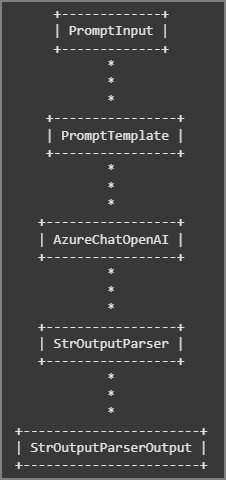

## Sequential Chains

In [ ]:
template_1 = PromptTemplate(template = "Generate a detailed report on {topic}", input_variables=['topic'])
template_2 = PromptTemplate(template = "Generate a 5 pointer summary from the following text \n {text}", input_variables=['text'])
parser = StrOutputParser()

chain = template_1 | model | parser | template_2 | model | parser
chain.invoke({'topic': "unemployment in india"})

**OUTPUT:**

```
1. **Current Unemployment Scenario**: India's unemployment rate in 2023 is around 7-8%, influenced by economic policies, global conditions, and the COVID-19 pandemic, with variations across states and regions.

2. **Causes of Unemployment**: Key factors include high population growth, economic slowdowns, skill mismatches, agricultural dependence, and structural issues like inadequate infrastructure and regulatory challenges.

3. **Impact of Unemployment**: Unemployment leads to economic challenges such as reduced consumer spending, social issues like poverty and inequality, and political instability due to pressure on governments to create jobs.

4. **Government Initiatives**: Efforts to combat unemployment include the Skill India Mission, Make in India, Startup India, and MGNREGA, focusing on skill development, manufacturing, entrepreneurship, and rural employment.

5. **Potential Solutions**: Addressing unemployment requires education reform for skill development, fostering entrepreneurship, investing in infrastructure, and implementing policy reforms to improve the business environment and attract investment.
```

In [ ]:
print("-- chain.get_name() -- \n", chain.get_name())
print("*"*75)
print("-- chain.get_prompts() -- \n", chain.get_prompts())
print("*"*75)
print("-- chain.get_output_jsonschema() -- \n", chain.get_output_jsonschema())
print("*"*75)
print("-- chain.get_graph().first_node() -- \n", chain.get_graph().first_node())
print("*"*75)
print("-- chain.get_graph().last_node() -- \n", chain.get_graph().last_node())

**OUTPUT**

```
-- chain.get_name() --
 RunnableSequence
***************************************************************************
-- chain.get_prompts() --
 [PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='Generate a detailed report on {topic}'), PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='Generate a 5 pointer summary from the following text \n {text}')]
***************************************************************************
-- chain.get_output_jsonschema() --
 {'title': 'StrOutputParserOutput', 'type': 'string'}
***************************************************************************
-- chain.get_graph().first_node() --
 Node(id='70d1d356b13144e08237fab2b6b0f2df', name='PromptInput', data=<class 'langchain_core.utils.pydantic.PromptInput'>, metadata=None)
***************************************************************************
-- chain.get_graph().last_node() --
 Node(id='fb91f8fa87524dd2a0988324a7feabff', name='StrOutputParserOutput', data=<class 'langchain_core.output_parsers.string.StrOutputParserOutput'>, metadata=None)
```

In [ ]:
# !pip install pygraphviz -q
# chain.get_graph().draw_png() → graph as png

In [ ]:
chain.get_graph().print_ascii()

```
     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
   +-----------------+     
   | AzureChatOpenAI |     
   +-----------------+     
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
   +-----------------+     
   | AzureChatOpenAI |     
   +-----------------+     
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  
```

## Parallel Chains

In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langchain.schema.runnable import RunnableParallel

# environment variable should be named as HUGGINGFACEHUB_API_TOKEN

llm = HuggingFaceEndpoint(
    repo_id="google/gemma-2-2b-it",
    task="text-generation"
)

model_hf_1 = ChatHuggingFace(llm=llm)

llm = HuggingFaceEndpoint(
    repo_id="microsoft/Phi-3-mini-4k-instruct",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)

model_hf_2 = ChatHuggingFace(llm=llm)

template1 = PromptTemplate(template = "Generate short and simple note from the following text: {text}", input_variables=['text'])
template2 = PromptTemplate(template = "Generate a 5 short question answers from the following text\n {text}", input_variables=['text'])
template3 = PromptTemplate(template = "Merge the provided notes and quiz into a single document \n notes -> {notes} and quiz -> {quiz}", input_variables=['notes', 'quiz'])

parser = StrOutputParser()

# parallel chains
parallel_chains = RunnableParallel({
    'notes': template1 | model_hf_1 | parser,
    'quiz': template2 | model_hf_2 | parser
})

# merge chains
merge_chains = template3 | model | parser

# connecting the parallel chains with merge chains
chains = parallel_chains | merge_chains

# note: we have used 3 different models to acheive each of the tasks

text = """
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.
"""

result = chains.invoke({"text": text})
result


**OUTPUT**

```
# Support Vector Machines (SVMs)

## Overview

**What it is:**  
Support Vector Machines (SVMs) are supervised learning methods used for classification, regression, and outlier detection.

## Advantages

- **High-Dimensional Spaces:** SVMs work well in high-dimensional spaces and are effective even when the number of features exceeds the number of samples.
- **Memory Efficiency:** They are memory-efficient as they use a small subset of training data, known as support vectors, in the decision function.
- **Versatility:** SVMs are versatile due to the ability to apply different kernel functions, including custom ones, to the decision function.

## Disadvantages

- **Overfitting Risk:** There is a risk of overfitting when the number of features is much larger than the number of samples. Careful selection of the kernel and regularization is necessary.
- **Probability Estimates:** SVMs do not directly provide probability estimates. These estimates require cross-validation, which can be computationally expensive.

## Best Input Practices

- **Dense Array:** Use a C-ordered `numpy.ndarray` or a structure convertible to `numpy.asarray` for optimal performance.
- **Sparse Array:** SVMs can also work with sparse data using `scipy.sparse` structures. For best results, use a `scipy.sparse.csr_matrix` with `dtype=float64`.

## Notes for Using SVM in Scikit-learn

- Research and select appropriate kernel functions and regularization terms to optimize performance.
- Ensure the dataset is compatible with the chosen model.
- Use cross-validation to calculate probabilities for accurate predictions.

## Quiz

1. **What are support vector machines (SVMs) primarily used for?**  
   SVMs are supervised learning methods used for classification, regression, and outlier detection.

2. **Why are SVMs effective in high-dimensional spaces?**  
   SVMs are effective in high-dimensional spaces because they use a subset of training points in the decision function, known as support vectors, making them memory efficient.

3. **How does SVM's versatility manifest?**  
   SVM's versatility comes from the possibility of specifying different kernel functions for the decision function. They come with common kernels, but it is possible to specify custom ones.

4. **What are some disadvantages of SVMs?**  
   The main disadvantages include the danger of overfitting when the number of features greatly exceeds the number of samples, and the fact that SVMs do not directly produce probability estimates, which are calculated using a costly five-fold cross-validation.

5. **What are the input requirements for optimal SVM's performance in scikit-learn?**  
   Scikit-learn's SVMs support both dense (`numpy.ndarray`) and sparse (`any scipy.sparse`) sample vectors as input. However, to predict for sparse data, the model must have been fit on such data. For the best performance, use a C-ordered `numpy.ndarray` (dense) or a `scipy.sparse.csr_matrix` (sparse) with `dtype=float64`.
```

### Note:

In `RunnableParallel()` we need to mention the names of the `variables` which will be fed after parallel processing is completed. In our example, `notes` and `quiz` are the two variables in the merge chains. Hence, in `RunnableParallel()`, the two variables need to be mentioned.

If the variables are not mentioned properly then the below error will occur:

> KeyError: "Input to PromptTemplate is missing variables {'notes'}.  Expected: ['notes', 'quiz'] Received: ['note', 'quiz']\nNote: if you intended {notes} to be part of the string and not a variable, please escape it with double curly braces like: '{{notes}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT"




In [ ]:
chains.get_graph().print_ascii()

```
              +---------------------------+              
              | Parallel<notes,quiz>Input |              
              +---------------------------+              
                  ***               ***                  
               ***                     ***               
             **                           **             
+----------------+                    +----------------+
| PromptTemplate |                    | PromptTemplate |
+----------------+                    +----------------+
          *                                   *          
          *                                   *          
          *                                   *          
+-----------------+                  +-----------------+
| ChatHuggingFace |                  | ChatHuggingFace |
+-----------------+                  +-----------------+
          *                                   *          
          *                                   *          
          *                                   *          
+-----------------+                  +-----------------+
| StrOutputParser |                  | StrOutputParser |
+-----------------+                  +-----------------+
                  ***               ***                  
                     ***         ***                     
                        **     **                        
             +----------------------------+              
             | Parallel<notes,quiz>Output |              
             +----------------------------+              
                            *                            
                            *                            
                            *                            
                   +----------------+                    
                   | PromptTemplate |                    
                   +----------------+                    
                            *                            
                            *                            
                            *                            
                  +-----------------+                    
                  | AzureChatOpenAI |                    
                  +-----------------+                    
                            *                            
                            *                            
                            *                            
                  +-----------------+                    
                  | StrOutputParser |                    
                  +-----------------+                    
                            *                            
                            *                            
                            *                            
                +-----------------------+                
                | StrOutputParserOutput |                
                +-----------------------+                
```

## Conditional Chains

In [ ]:
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from typing import Literal

class Feedback(BaseModel):
  sentiment: Literal['positive', 'negative'] = Field(description = "gives the sentiment of the feedback")

parser = StrOutputParser()
parser_pd = PydanticOutputParser(pydantic_object=Feedback)

template1 = PromptTemplate(
    template = "classify the sentiment of the following feedback text into positive or negative \n {feedback}",
    input_variables=['feedback']
)

classifier_chain = template1 | model | parser
result = classifier_chain.invoke({'feedback': 'this is a terrible smartphone'})
print(result)
print("="*72)

# updating the template for pydantic instructions
template1 = PromptTemplate(
    template = "classify the sentiment of the following feedback text into positive or negative \n {feedback} \n {format_instructions}",
    input_variables=['feedback'],
    partial_variables={"format_instructions": parser_pd.get_format_instructions()}
)
classifier_chain = template1 | model | parser_pd
result = classifier_chain.invoke({'feedback': 'this is a terrible smartphone'})
print(result.sentiment)

**OUTPUT:**

```
Negative
========================================================================
negative
```

In [ ]:
from langchain.schema.runnable import RunnableBranch, RunnableLambda

template2 = PromptTemplate(
    template = 'Write an appropriate response to this positive feedback \n {feedback}',
    input_variables=['feedback']
)

template3 = PromptTemplate(
    template = 'Write an appropriate response to this negative feedback \n {feedback}',
    input_variables=['feedback']
)

branch_chain = RunnableBranch(
    # (condition1, chain)
    # (condition2, chain)
    # ...
    # default runnable chain
    (lambda x: x.sentiment == "positive", template2 | model | parser),
    (lambda x: x.sentiment == "negative", template3 | model | parser),
    RunnableLambda(lambda x: "couldn't find sentiment")
)

final_chain = classifier_chain | branch_chain
result = final_chain.invoke({'feedback': 'this is a terrible smartphone'})
print(result)

**OUTPUT:**

```
Thank you for sharing your feedback with us. We’re sorry to hear that your experience didn’t meet your expectations. We value your input and are committed to improving our services. Please feel free to reach out to us directly at [contact information] so we can address your concerns and work towards a resolution. Your satisfaction is important to us, and we hope to have the opportunity to make things right.
```

In [ ]:
result = final_chain.invoke({'feedback': 'this is an awesome smartphone'})
print(result)

**OUTPUT:**

```
Thank you so much for your positive feedback! I'm thrilled to hear that you had a great experience. Your support and satisfaction mean a lot to us, and we're committed to maintaining this level of service. If there's anything else we can do for you, please don't hesitate to let us know.
```